In [32]:
from physDBD import ImportHelper, DataDesc, Params0GaussTraj, RxnInputsGaussLayer, \
    DParams0GaussTraj, RxnGaussModel, TrainingGaussData, DataTypeGauss, DParams0Gauss, Params0Gauss
import numpy as np
import tensorflow as tf
import sys
import os
import datetime
import pickle
import matplotlib.pyplot as plt
import copy

# Analyze trained

In [55]:
model_trained = tf.keras.models.load_model("trained/trained_final")

# Load lowest validation weights
# model_trained.load_weights("trained/weights_lowest_val")

In [56]:
mean_mu = np.loadtxt("cache/trans_params_mean_mu.txt")
mean_chol_v_vec = np.loadtxt("cache/trans_params_mean_chol_v_vec.txt")
stddev_mu = np.loadtxt("cache/trans_params_stddev_mu.txt")
stddev_chol_v_vec = np.loadtxt("cache/trans_params_stddev_chol_v_vec.txt")

mean_dmu = np.loadtxt("cache/trans_params_norm_deriv_mean_dmu.txt")
mean_dchol_v_vec = np.loadtxt("cache/trans_params_norm_deriv_mean_dchol_v_vec.txt")
stddev_dmu = np.loadtxt("cache/trans_params_norm_deriv_stddev_dmu.txt")
stddev_dchol_v_vec = np.loadtxt("cache/trans_params_norm_deriv_stddev_dchol_v_vec.txt")

## Integrate

In [57]:
def un_normalize_deriv(dparam):
    # Un-normalize
    dparam_ret = copy.deepcopy(dparam)
    dparam_ret.dmu_v = stddev_dmu * dparam_ret.dmu_v + mean_dmu
    dparam_ret.dchol_v[0,0] = stddev_dchol_v_vec[0] * dparam_ret.dchol_v[0,0] + mean_dchol_v_vec[0]
    dparam_ret.dchol_v[1,0] = stddev_dchol_v_vec[1] * dparam_ret.dchol_v[1,0] + mean_dchol_v_vec[1]
    dparam_ret.dchol_v[1,1] = stddev_dchol_v_vec[2] * dparam_ret.dchol_v[1,1] + mean_dchol_v_vec[1]
    return dparam_ret

def un_normalize_param(param):
    # Un-normalize
    param_ret = copy.deepcopy(param)
    param_ret.mu_v = stddev_mu * param_ret.mu_v + mean_mu
    param_ret.chol_v[0,0] = stddev_chol_v_vec[0] * param_ret.chol_v[0,0] + mean_chol_v_vec[0]
    param_ret.chol_v[1,0] = stddev_chol_v_vec[1] * param_ret.chol_v[1,0] + mean_chol_v_vec[1]
    param_ret.chol_v[1,1] = stddev_chol_v_vec[2] * param_ret.chol_v[1,1] + mean_chol_v_vec[1]
    return param_ret

In [ ]:
def predict_params0_norm_deriv(params0_norm_curr: Params0Gauss, verbose: bool = False) -> DParams0Gauss:
    params0_curr = un_normalize_param(params0_norm_curr)
    if verbose:
        print("Params0 curr", params0_curr)

    non_zero_idx_pairs_vv = [(0,0),(1,0),(1,1)]
    input0 = params0_curr.get_tf_input(
        tpt=0,
        non_zero_idx_pairs_vv=[(0,0),(1,0),(1,1)]
        )
    output0 = model_trained(input0)

    params0_norm_deriv_norm = DParams0Gauss.fromLFdict(output0, nv=2)
    if verbose:
        print("Params0 norm deriv norm",params0_norm_deriv_norm)

    params0_norm_deriv = un_normalize_deriv(params0_norm_deriv_norm)
    if verbose:
        print("Params0 norm deriv",params0_norm_deriv)
    
    return params0_norm_deriv

In [67]:
params0_norm_traj = Params0GaussTraj.fromFile("cache/cache_params_norm_filtered.txt", nv=2)
tpt_start = 500
params0_norm_start = params0_norm_traj.params0_traj[tpt_start]
print("Params0 norm start",params0_norm_start)

Params0 norm start Params0Gauss(mu_v=array([ 1.26284308, -0.11480214]), chol_v=array([[1.00000000e-06, 0.00000000e+00],
       [1.67238322e-01, 2.76808804e-01]]), _nv=2)


In [71]:
params0_norm_int = [params0_norm_start]
print("Params0 norm curr", params0_norm_int[-1])

no_tpts = 250
for tpt in range(0,no_tpts):
    print("%03d / %03d" % (tpt, no_tpts))

    params0_norm_deriv = predict_params0_norm_deriv(params0_norm_int[-1])

    params0_norm_next = Params0Gauss.addDeriv(params0_norm_int[-1], params0_norm_deriv)
    params0_norm_int.append(params0_norm_next)
    # print("Params0 norm next",params0_norm_next)

Params0 norm curr Params0Gauss(mu_v=array([ 1.26284308, -0.11480214]), chol_v=array([[1.00000000e-06, 0.00000000e+00],
       [1.67238322e-01, 2.76808804e-01]]), _nv=2)
000 / 250
001 / 250
002 / 250
003 / 250
004 / 250
005 / 250
006 / 250
007 / 250
008 / 250
009 / 250
010 / 250
011 / 250
012 / 250
013 / 250
014 / 250
015 / 250
016 / 250
017 / 250
018 / 250
019 / 250
020 / 250
021 / 250
022 / 250
023 / 250
024 / 250
025 / 250
026 / 250
027 / 250
028 / 250
029 / 250
030 / 250
031 / 250
032 / 250
033 / 250
034 / 250
035 / 250
036 / 250
037 / 250
038 / 250
039 / 250
040 / 250
041 / 250
042 / 250
043 / 250
044 / 250
045 / 250
046 / 250
047 / 250
048 / 250
049 / 250
050 / 250
051 / 250
052 / 250
053 / 250
054 / 250
055 / 250
056 / 250
057 / 250
058 / 250
059 / 250
060 / 250
061 / 250
062 / 250
063 / 250
064 / 250
065 / 250
066 / 250
067 / 250
068 / 250
069 / 250
070 / 250
071 / 250
072 / 250
073 / 250
074 / 250
075 / 250
076 / 250
077 / 250
078 / 250
079 / 250
080 / 250
081 / 250
082 / 250
0

Text(0.5, 0, 'timepoint')

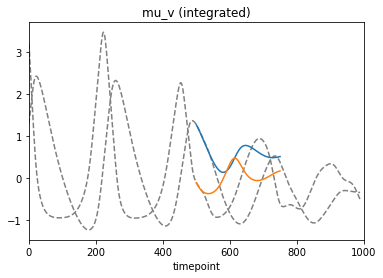

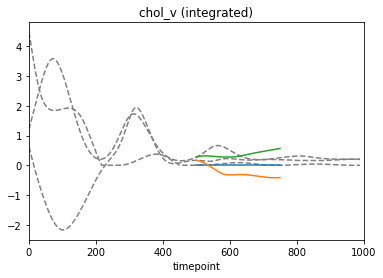

In [72]:
# Import params traj
params0_traj_norm_filtered = Params0GaussTraj.fromFile("cache/cache_params_norm_filtered.txt", nv=2)

tpts_int = np.arange(tpt_start,tpt_start+len(params0_norm_int))

plt.figure()
plt.plot([x.mu_v[0] for x in params0_traj_norm_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot([x.mu_v[1] for x in params0_traj_norm_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot(tpts_int,[x.mu_v[0] for x in params0_norm_int])
plt.plot(tpts_int,[x.mu_v[1] for x in params0_norm_int])
plt.xlim(0,1000)
plt.title("mu_v (integrated)")
plt.xlabel("timepoint")

plt.figure()
plt.plot([x.chol_v[0,0] for x in params0_traj_norm_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot([x.chol_v[1,0] for x in params0_traj_norm_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot([x.chol_v[1,1] for x in params0_traj_norm_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot(tpts_int,[x.chol_v[0,0] for x in params0_norm_int])
plt.plot(tpts_int,[x.chol_v[1,0] for x in params0_norm_int])
plt.plot(tpts_int,[x.chol_v[1,1] for x in params0_norm_int])
plt.xlim(0,1000)
plt.title("chol_v (integrated)")
plt.xlabel("timepoint")

Text(0.5, 0, 'timepoint')

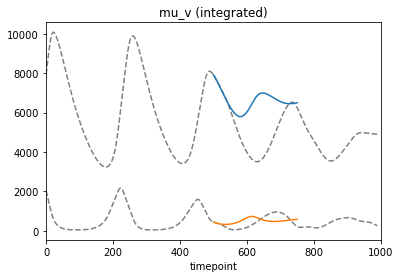

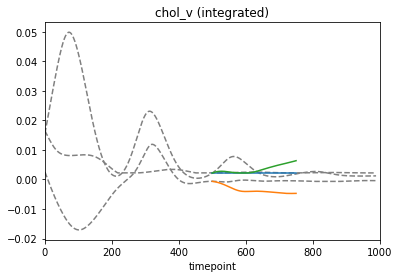

In [76]:
params0_int = [un_normalize_param(p) for p in params0_norm_int]

# Import params traj
params0_traj_filtered = Params0GaussTraj.fromFile("cache/cache_params_filtered.txt", nv=2)

tpts_int = np.arange(tpt_start,tpt_start+len(params0_int))

plt.figure()
plt.plot([x.mu_v[0] for x in params0_traj_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot([x.mu_v[1] for x in params0_traj_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot(tpts_int,[x.mu_v[0] for x in params0_int])
plt.plot(tpts_int,[x.mu_v[1] for x in params0_int])
plt.xlim(0,1000)
plt.title("mu_v (integrated)")
plt.xlabel("timepoint")

plt.figure()
plt.plot([x.chol_v[0,0] for x in params0_traj_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot([x.chol_v[1,0] for x in params0_traj_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot([x.chol_v[1,1] for x in params0_traj_filtered.params0_traj], color="gray", linestyle="dashed")
plt.plot(tpts_int,[x.chol_v[0,0] for x in params0_int])
plt.plot(tpts_int,[x.chol_v[1,0] for x in params0_int])
plt.plot(tpts_int,[x.chol_v[1,1] for x in params0_int])
plt.xlim(0,1000)
plt.title("chol_v (integrated)")
plt.xlabel("timepoint")

(-1000000.0, 2000000.0)

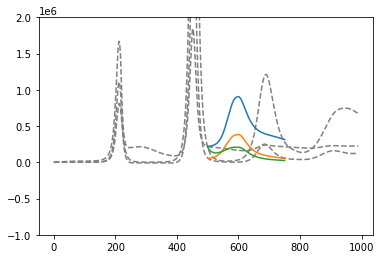

In [89]:
cov_v_int = [x.cov_v for x in params0_int]

# Import params traj
params0_traj_filtered = Params0GaussTraj.fromFile("cache/cache_params_filtered.txt", nv=2)
cov_v_filtered = [x.cov_v for x in params0_traj_filtered.params0_traj]

tpts_int = np.arange(tpt_start,tpt_start+len(params0_int))

plt.figure()
plt.plot([x[0,0] for x in cov_v_filtered], color='gray', linestyle="dashed")
plt.plot([x[1,0] for x in cov_v_filtered], color='gray', linestyle="dashed")
plt.plot([x[1,1] for x in cov_v_filtered], color='gray', linestyle="dashed")
plt.plot(tpts_int,[x[0,0] for x in cov_v_int])
plt.plot(tpts_int,[x[1,0] for x in cov_v_int])
plt.plot(tpts_int,[x[1,1] for x in cov_v_int])
plt.ylim(-1e6,2e6)